Tarea 1  
**Nombre**: Arturo Lazcano  
**Curso**: MA4703 Control Óptimo: Teoría y Laboratorio  
**Profesor**: Héctor Ramírez  
**Auxiliares**: Javier Madariaga y Pablo Araya  

# Import librerías

In [ ]:
import sympy
sympy.__version__

'1.10.1'

In [ ]:
! pip install --upgrade sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import scipy as sp
from sympy import *

# Ejercicio 1
## (a)

Resolución teórica de un sistema de edos usando sympy:

In [ ]:
# Definir variables y funciones
t = symbols('t')
x, y = symbols('x, y', cls=Function)
# Definir ecuaciones
eq1 = Derivative(x(t),t) - 2*x(t) + x(t)*y(t)
eq2 = Derivative(y(t),t) + y(t) - cos(y(t))
eqq = (eq1, eq2)
# Resolver
dsolve(eqq, [x(t), y(t)])

[Eq(x(t), exp(-C1 + exp(-C2 - t) + 2)),
 Eq(y(t), C1 + log(exp(-C1 + exp(-C2 - t) + 2)))]

## (b)

Resolución numérica del sistema de edos en [0,5] usando scipy:

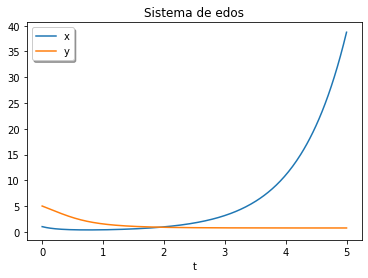

In [ ]:
# Definir sistema
def sistema(t, z):
  x, y = z
  return [2*x-x*y, -y + cos(y)]

# Resolver y graficar  
sol = sp.integrate.solve_ivp(sistema, t_span=[0, 5], y0=[1, 5], dense_output=True)
t = np.linspace(0, 5, 300)
z = sol.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Sistema de edos')
plt.show()

## (c)
(Esta sección se ejecutó en otro computador por lo que incluyo el código usado y las imagenes que se obtuvieron como resultado)  
Gráfico de diagramas de fase usando applet "pyplane":

In [ ]:
!pip install git+https://github.com/TUD-RST/pyplane.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/TUD-RST/pyplane.git to /tmp/pip-req-build-lu5iryod
  Running command git clone -q https://github.com/TUD-RST/pyplane.git /tmp/pip-req-build-lu5iryod


In [ ]:
import pyplane.app as pp
pp.run()

Condiciones iniciales: $(x_0,y_0)=(1,5)$

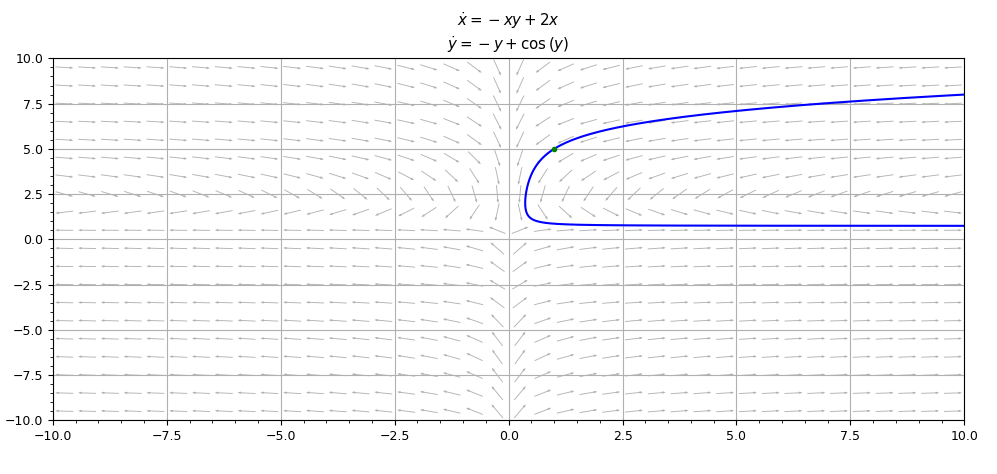

Condiciones iniciales: $(x_0,y_0)=(1,-1)$

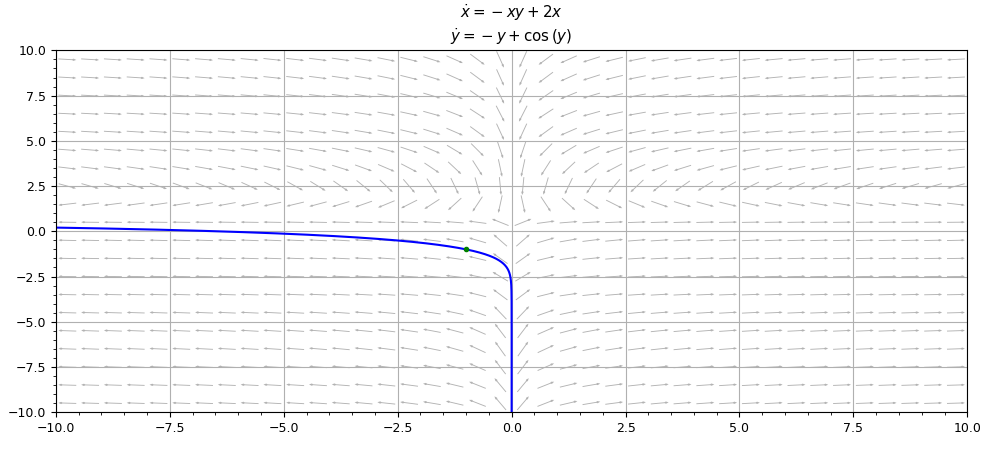

Condiciones iniciales: $(x_0,y_0)=(5,2)$

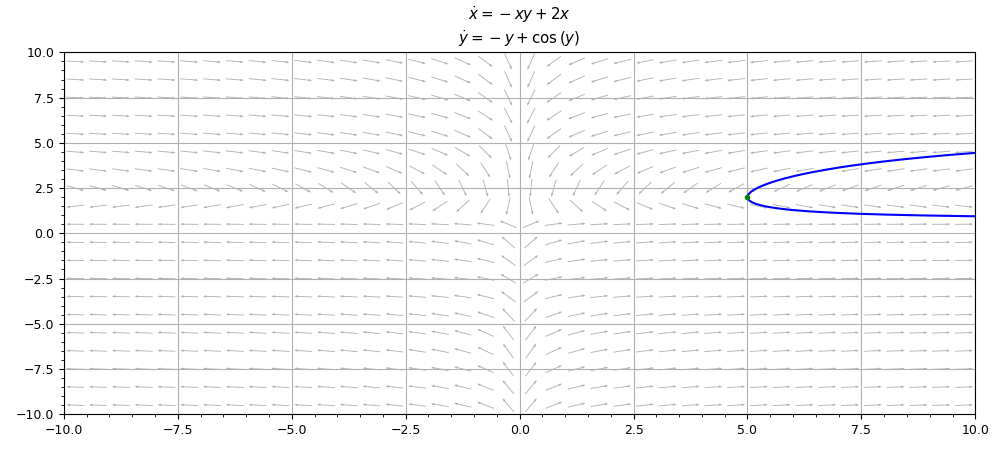

# Ejercicio 2


Resolución de sistema en $\mathbb{R}^2$ con condición inicial (0,0) y distintos valores/funciones para e control $u(\cdot)$. Luego, se grafican todas en un mismo plot para comparar los sistemas.

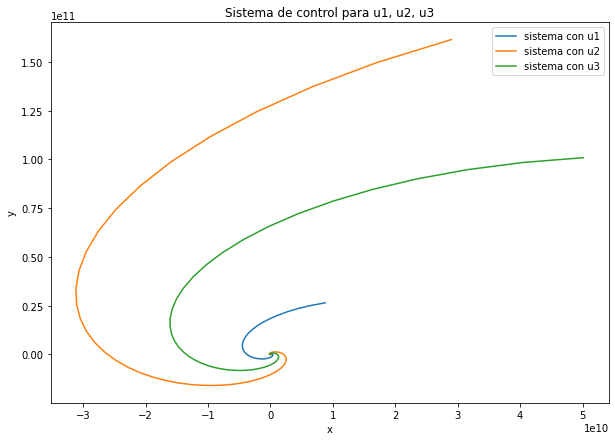

In [5]:
# Definicion de matrices y condición inicial
A=np.array([[2,2],[-5,3]])
B=np.array([5, 1])
x0=[0, 0]

# Definición de diferentes controles
def u1(t):
  return 0.2
def u2(t):
  return np.exp(t)
def u3(t):
  return np.exp(-t)*cos(t)
  
# Definiciòn de sistemas separados por los controles u1, u2, u3
def sistemau1(t, x):
  return np.matmul(A,x) + np.array([B[0]*u1(t), B[1]*u1(t)])
def sistemau2(t, x):
  return np.matmul(A,x) + np.array([B[0]*u2(t), B[1]*u2(t)])
def sistemau3(t, x):
  return np.matmul(A,x) + np.array([B[0]*u3(t), B[1]*u3(t)])

plt.figure(figsize=(10,7))  
# Resolución y grafico para u1
sol1 = sp.integrate.solve_ivp(sistemau1, t_span=[0, 10], y0=x0, dense_output=True)
t = np.linspace(0, 10, 300)
z = sol1.sol(t)
plt.plot(z[0], z[1], label='sistema con u1')

# Resolución y grafico para u2
sol2 = sp.integrate.solve_ivp(sistemau2, t_span=[0, 10], y0=x0, dense_output=True)
z2 = sol2.sol(t)
plt.plot(z2[0], z2[1], label='sistema con u2')

# Resolución y grafico para u3
sol3 = sp.integrate.solve_ivp(sistemau3, t_span=[0, 10], y0=x0, dense_output=True)
z3 = sol3.sol(t)
plt.plot(z3[0], z3[1], label='sistema con u3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Sistema de control para u1, u2, u3')
plt.show()

Notar que acá todas parten del mismo punto inicial $x_0 = (0,0)$

# Ejercicio 3

Acá se resuelve un problema de optimización (miniimzar) escrito como PL:

In [ ]:
# Definición de parámetros dada la documentación de scipy linprog
c = [-8, -1, -3]
A = [[-1, 1, 1], [3, 5, 5], [9, -5, 0]]
b = [13, 10, 20]

# x,y,z>0
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)

# Resolver PL con parámetros anteriores
res = sp.optimize.linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds])
print(res.fun)
print(res.x)
print(res.message)

-20.499999995246238
[2.50000000e+00 5.00000000e-01 8.59215039e-10]


'Optimization terminated successfully.'

Se prueban un par de métodos más para verificar si existe algun otro resultado que pueda no coincidir con el óptimo ya encontrado:

In [ ]:
# Método "interior-point"
res2 = sp.optimize.linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='interior-point')
print(res2.fun)
print(res2.x)
print(res2.message)

-20.499999995246238
[2.50000000e+00 5.00000000e-01 8.59215039e-10]
Optimization terminated successfully.


In [ ]:
# Método "simplex"
res3 = sp.optimize.linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='simplex')
print(res3.fun)
print(res3.x)
print(res3.message)

-20.5
[2.5 0.5 0. ]
Optimization terminated successfully.


Con esto se puede concluir que los métodos llegaron al mismo punto óptimo tanto de valores de (x,y,z) y obviamente de la función. Por otro lado, en este problema especifico no hay una diferencia notable en el tiempo de ejecución de estos algoritmos.

# Ejercicio 4

Acá se asume un paquete de forma paralelepípeda rectangular, por lo cual se le asigna un vector $x=(x_1,x_2,x_3)$ a las medidas de las bases y altura respectivamente. Con esto, se quiere maximizar el volumen por lo cual se estudia la multiplicación de estas y se usa el signo menos para hacer equivalente el problema.

In [ ]:
# Definición de función a minimizar y sus restricciones
fun = lambda x: -(x[0]*x[1]*x[2])
cons = ({'type': 'ineq', 'fun': lambda x:  -2*x[0] - 2*x[1] - x[2] + 53})
bnds = ((0, None), (0, None), (0, None))
res = sp.optimize.minimize(fun, (2, 5, 1), method='SLSQP', bounds=bnds,
               constraints=cons)
print(res)
# Acá falta el signo '-' que falta para que el problema de maximización sea equivalente al de minimizar
print('\n','Valor óptimo del volumen:', -res.fun)
print('Valores óptimos de las aristas:', res.x)

     fun: -1378.490739993857
     jac: array([-156.05677795, -156.05447388,  -78.02772522])
 message: 'Optimization terminated successfully'
    nfev: 39
     nit: 10
    njev: 9
  status: 0
 success: True
       x: array([ 8.83326505,  8.83339483, 17.66668024])

 Valor óptimo del volumen: 1378.490739993857
Valores óptimos de las aristas: [ 8.83326505  8.83339483 17.66668024]


# Ejercicio 5

En este ejercicio se grafican cónicas y se busca su intersección con el uso de scipy.  
Observando el exponente de las cónicas se puede intuir que pueden llegar a 2 raíces dependiendo de las constantes que las acompañan por lo cual se optimiza moviendo el punto de partida hasta encontrar otra raíz.

In [7]:
# Función que en cada coordenada tiene una ecuación igual a 0
def f(x):
  return [2*(x[0]**2) + x[1] - 1, (x[0]-1/2)**2 - 2*((x[1]-1/4)**2) - 1]

# Se parte de 2 puntos iniciales distintos para encontrar las 2 intersecciones de las cónicas
# Punto de partida (0,0)
root1 = sp.optimize.fsolve(f, [0, 0])
print('Estimación primera raíz', root1)
# Punto de partida (-1,-1)
root2 = sp.optimize.fsolve(f, [-1, -1])
print('Estimación segunda raíz', root1)

Estimación primera raíz [-0.53273178  0.4323937 ]
Estimación segunda raíz [-0.53273178  0.4323937 ]


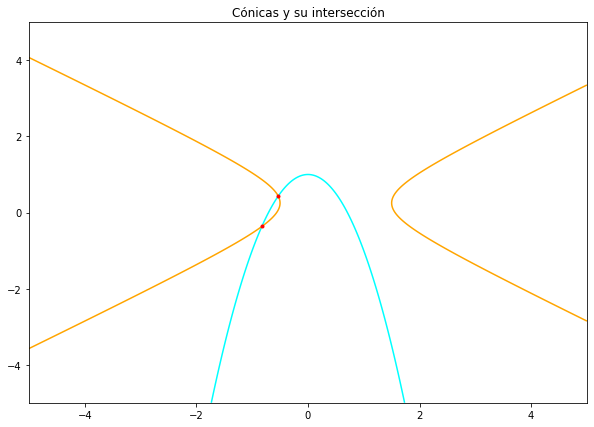

In [10]:
# Gráfico de cónicas 
plt.figure(figsize=(10,7)) 
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
plt.contour(x, y,(2*(x**2)+y), [1], colors='cyan')
plt.contour(x, y, (x-1/2)**2 - 2*((y-1/4)**2), [1], colors='orange')
plt.plot(root1[0], root1[1], '.', c='red')
plt.plot(root2[0], root2[1], '.', c='red')
plt.title('Cónicas y su intersección')
plt.show()

# Ejercicio 6
## 1.

De acuerdo a la formulación (M) del enunciado, lo primero que debemos hacer es un problema equivalente entre minimizar y maximizar. Como la relación entre estos es que $min f(x) ⟺ - max -f(x)$ se puede concluir que la función $J$ de este problema es $J=-c(t_f)$.  
Luego, la dinámica del problema se escribirá en términos de $a, b, c$:  
\begin{equation}
\dot{
\begin{pmatrix}
a\\
b\\
c
\end{pmatrix}}
= \begin{pmatrix}
-u(t)(k_1a(t)-k_2b(t)) \\
u(t)(k_1a(t) − k_2b(t)) − (1 − u(t))k_3b(t) \\
 (1 − u(t))k_3b(t) \\
\end{pmatrix}
\end{equation}
Donde la matriz de la derecha representa la función $f$ y la de la izquierda los estados $y$ derivados.  
La función $\Phi$ es sobre las condiciones de borde por lo cual viene dada por $\Phi(t0, y(t0), tf , y(tf )) = (a(0), b(0), c(0))$:  
$\begin{pmatrix}
a(0)\\
b(0)\\
c(0)
\end{pmatrix}
= \begin{pmatrix}
1\\
0\\
1
\end{pmatrix}$  
(El ejemplo de Jackson_basic tiene c(0)=0 a diferencia del enunciado entregado que dice c(0)=1, por lo que se dejó c(0)=1).  
Luego, no hay restricciones del tipo $g(y(t), u(t))$. Con todo lo anterior, es fácil notar que $\Phi_l, \Phi_u = 0,1$  
$g_l,g_u = 0,0$ (no hay restricciones de este tipo).  
$y_l,y_u = 0,0$ (el problema no impone restricciones de este tipo, sin embargo, se pudisese llegar a pensar que $a,b,c \geq 0$ pues las fracciones molares debieser ser no negativas.).  
$u_l, u_u = 0,1$.  
Por lo tanto, este problema reformulado como (M) resulta:  
\begin{cases} 
      -min -c(t_f) \\
\quad\quad \begin{equation}
\dot{
\begin{pmatrix}
a\\
b\\
c
\end{pmatrix}}
= \begin{pmatrix}
-u(t)(k_1a(t)-k_2b(t)) \\
u(t)(k_1a(t) − k_2b(t)) − (1 − u(t))k_3b(t) \\
 (1 − u(t))k_3b(t) \\
\end{pmatrix}
\end{equation}\\
\quad \quad \begin{pmatrix}
1\\
0\\
1
\end{pmatrix} \leq \begin{pmatrix}
a(0)\\
b(0)\\
c(0)
\end{pmatrix} \leq \begin{pmatrix}
1\\
0\\
1
\end{pmatrix}\\
\quad \quad 0 \leq u(t) \leq 1
\end{cases}

## 2.

Para el caso de abajo ($a(t_f)=0.7$ y $t_f=5$) es la única configuración en el cual BOCOP muestra un mensaje en rojo de posible problema de infactibilidad. Esto se puede deber a que el $a(t_f)$ no es exactamente 0.7 sino que resulta $\sim$0.7005 por lo cual capta un pequeño error. Del punto de vista práctico, ese error puede ser aceptable despendiendo del contexto por lo cual se deja esa configuración como resultado final.

$a(t_f)=0.7$ y $t_f=5$

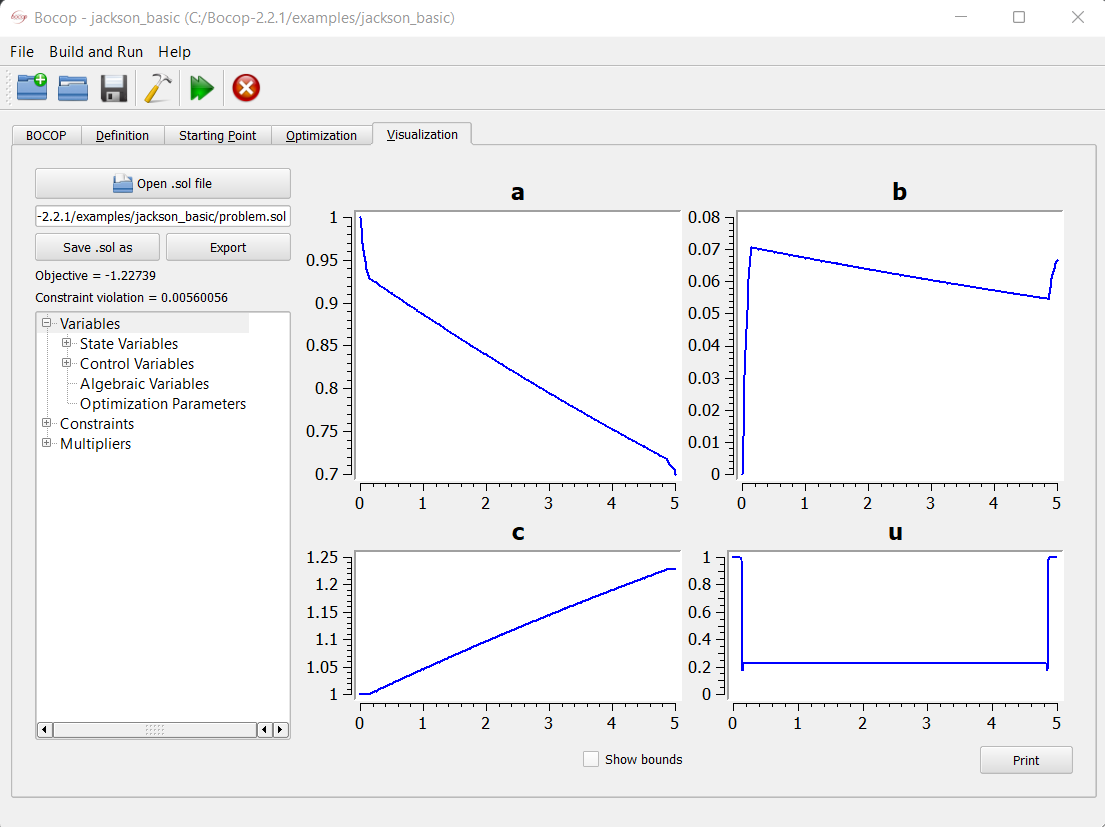

$a(t_f)=0.9$ y $t_f=5$

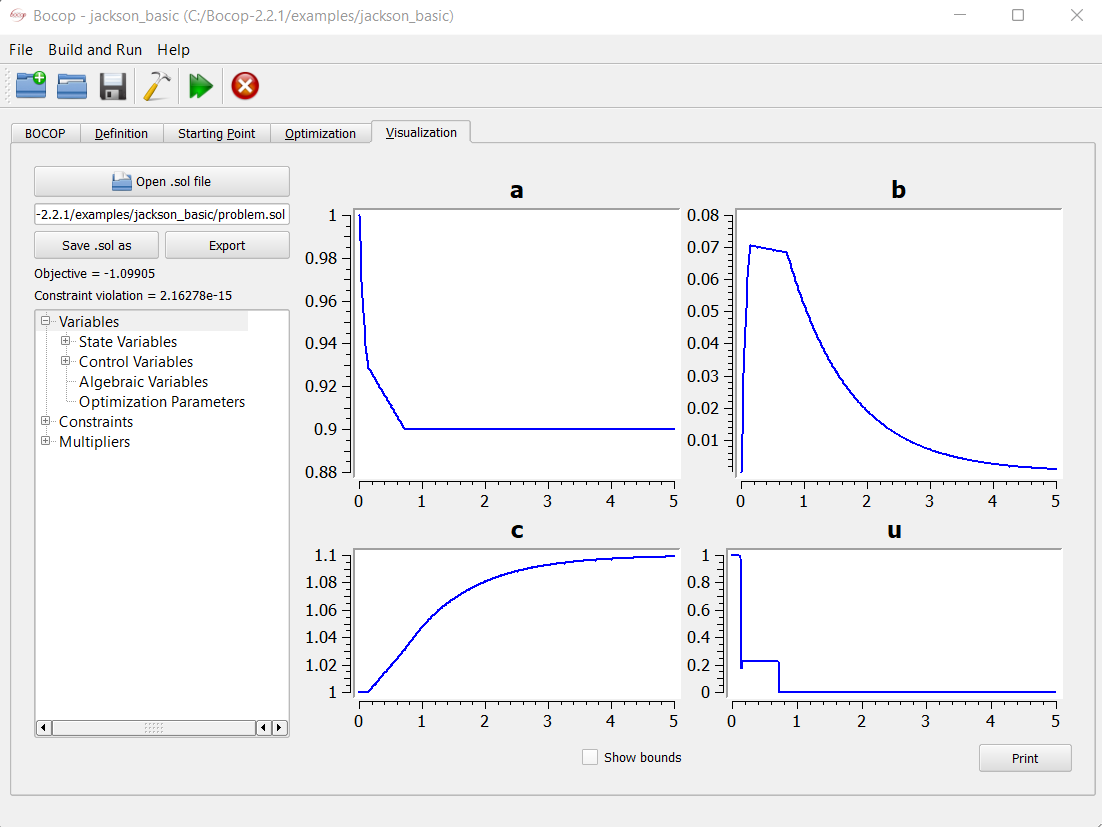

$a(t_f)=0.7$ y $t_f=7$

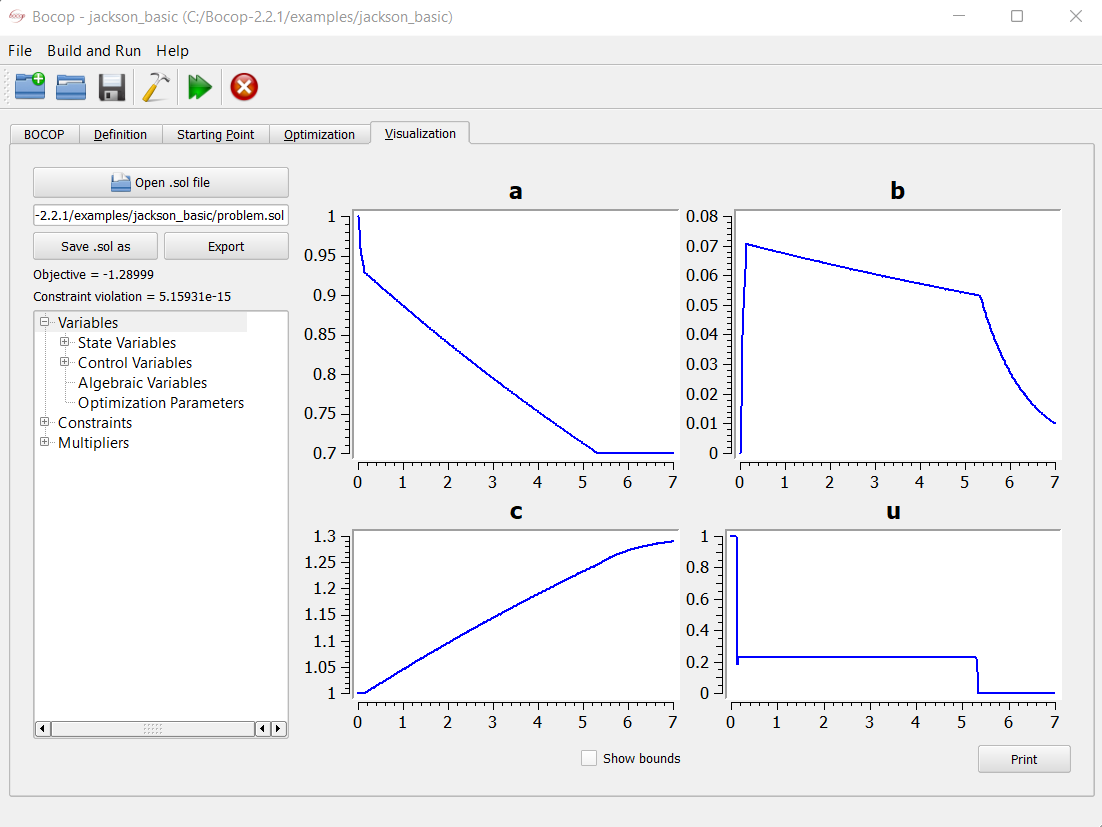

$a(t_f)=0.9$ y $t_f=7$

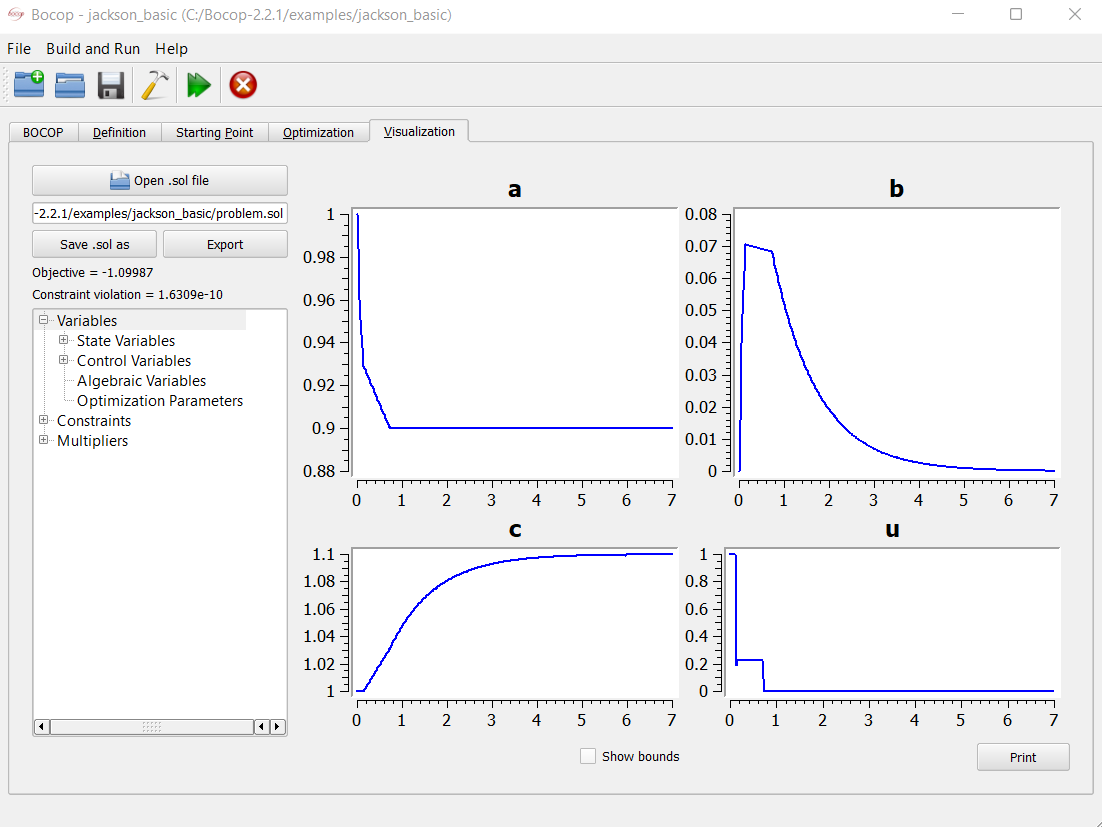

$a(t_f)=0.7$ y $t_f=10$

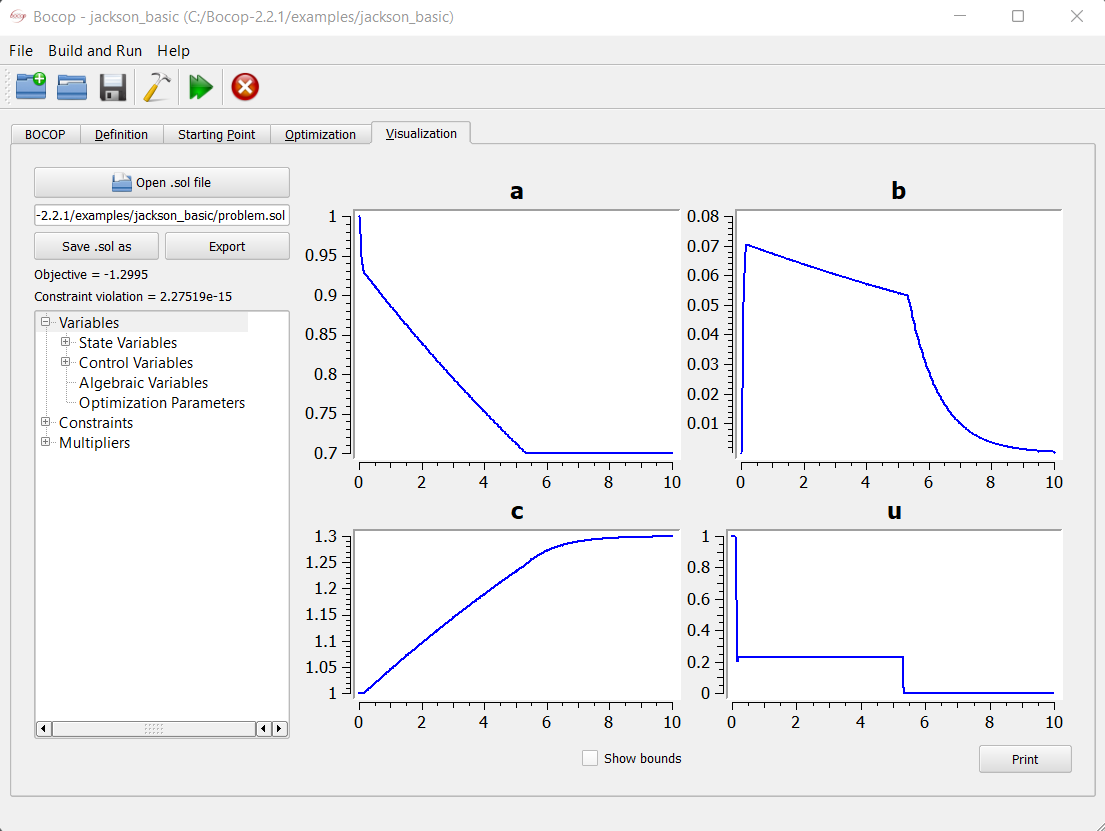

$a(t_f)=0.9$ y $t_f=10$

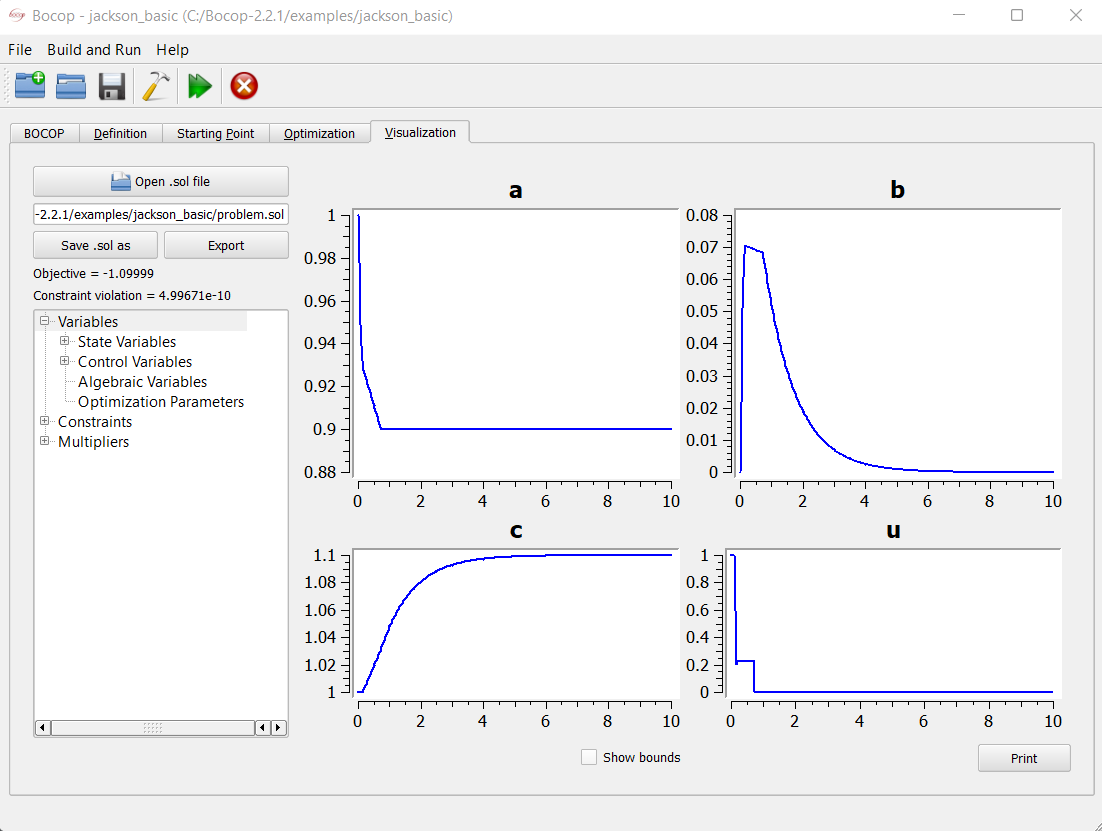

## 3.

$a(t_f) \geq 0.8$ y $b(t_f) \geq 0.05$ con $t_f=5$

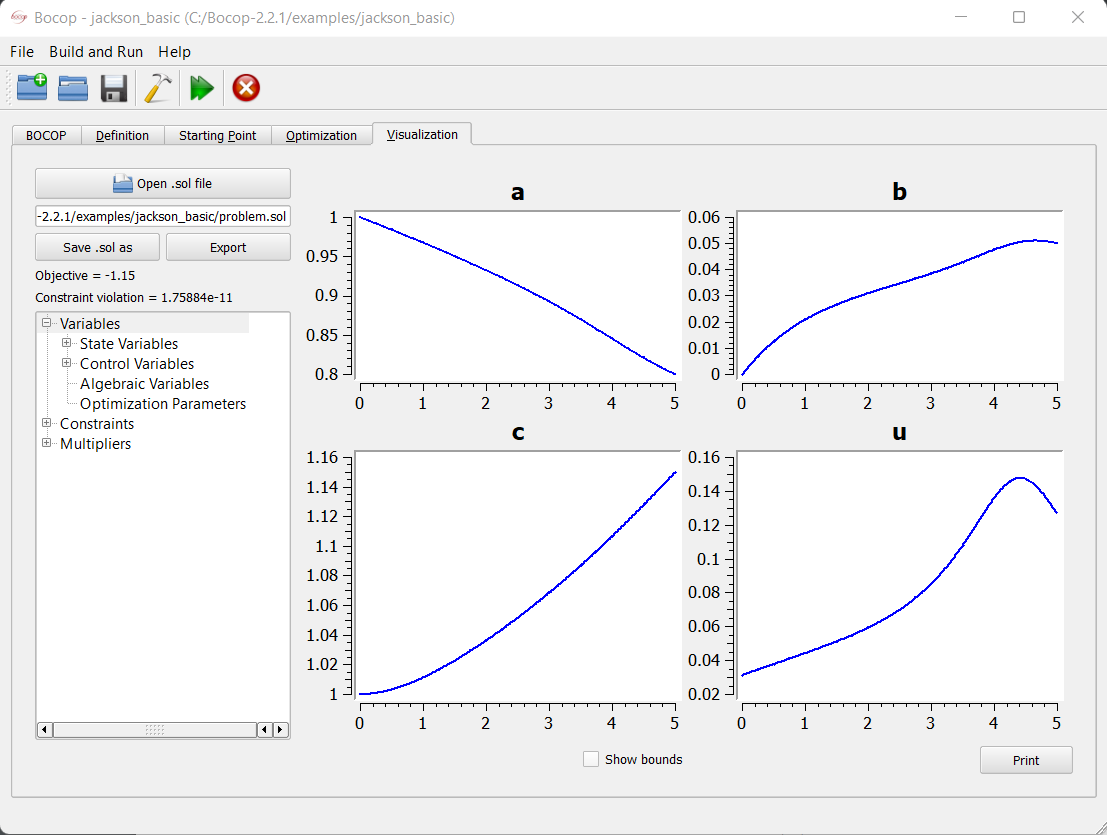

$a(t_f) \geq 0.8$ y $b(t_f) \geq 0.05$ con $t_f=7$

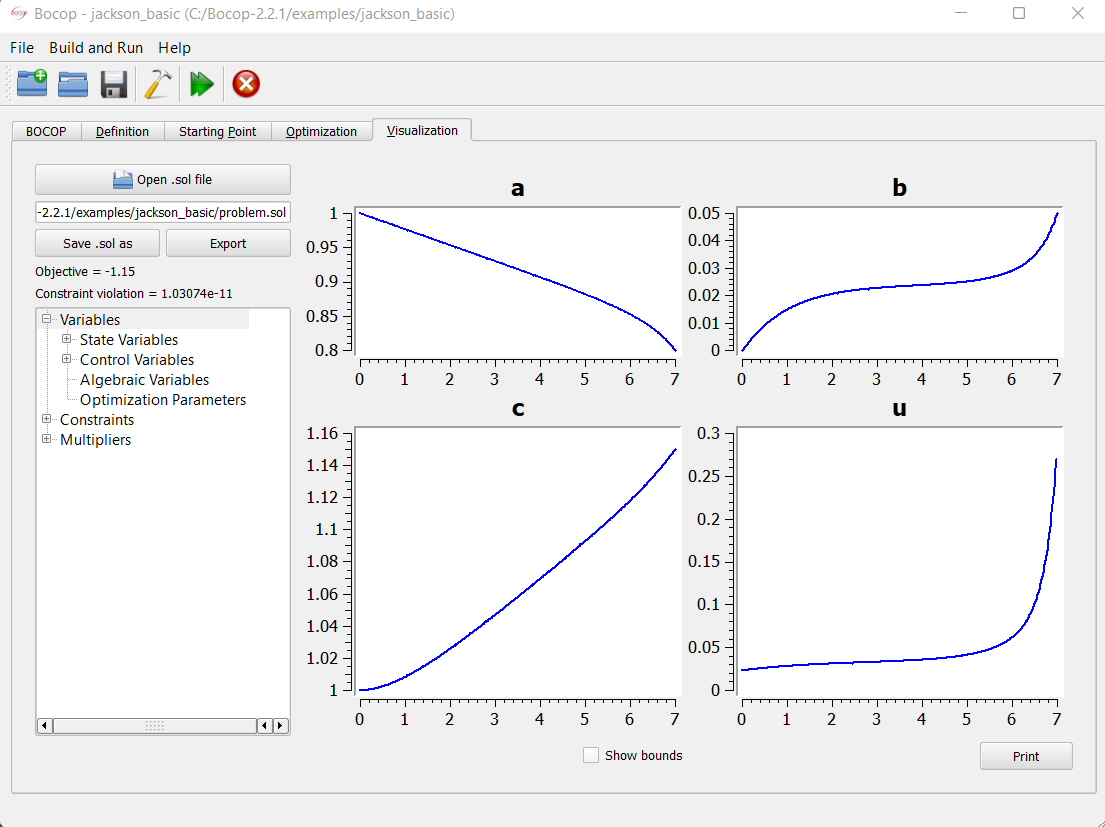

$a(t_f) \geq 0.8$ y $b(t_f) \geq 0.05$ con $t_f=10$

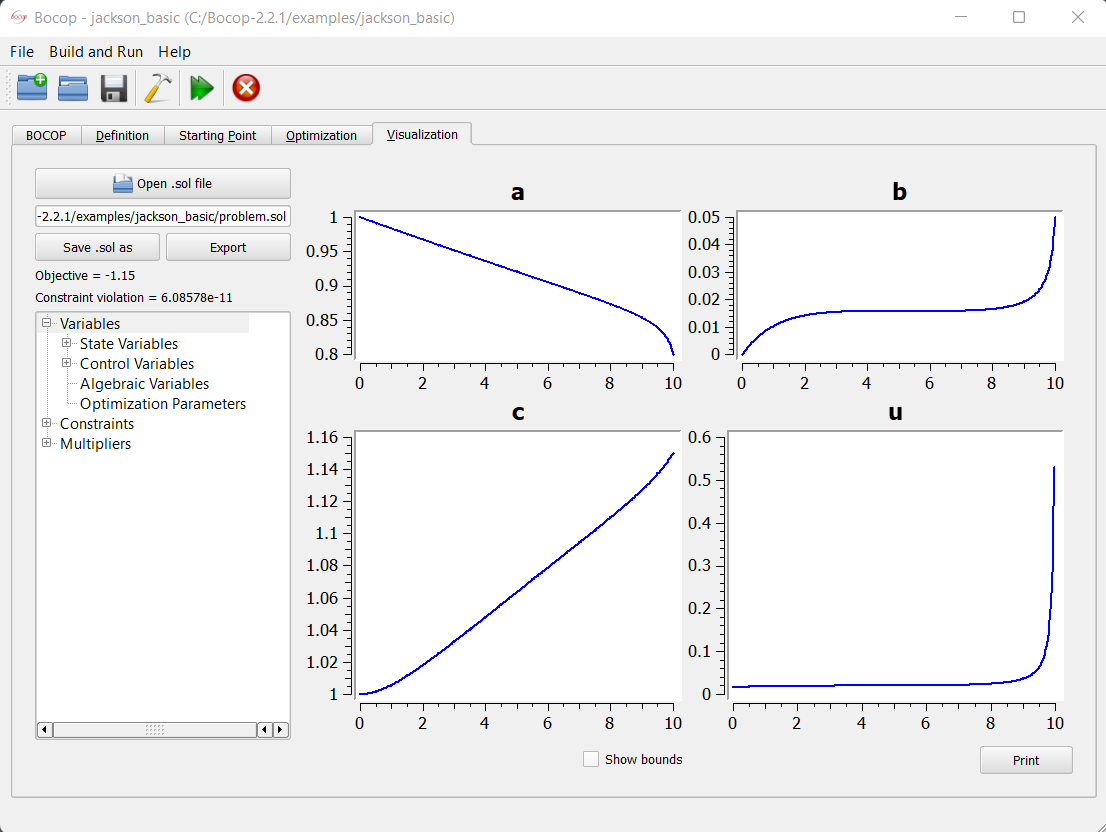

# Ejercicio 7
## 1
El problema puede verse de la siguiente forma con los cambios de variable $v=\dot{y}$ y $w=\ddot{y}$ :  
\begin{cases} 
\displaystyle
      min_{u(\cdot)} \int_0^{t_f} u(t)^2dt\\
\begin{equation}
\quad\quad
\dot{
\begin{pmatrix}
y\\
v\\
w
\end{pmatrix}}
= \begin{pmatrix}
v \\
w \\
u(t) \\
\end{pmatrix}
\end{equation}\\
\quad \quad \begin{pmatrix}
1\\
-2\\
0\\
0\\
0\\
0
\end{pmatrix} \leq \begin{pmatrix}
y(0)\\
v(0)\\
w(0)\\
y(t_f)\\
v(t_f)\\
w(t_f)
\end{pmatrix}(0) \leq \begin{pmatrix}
1\\
-2\\
0\\
0\\
0\\
0
\end{pmatrix}\\
\quad \quad 0 \leq y(t)
\end{cases}

Luego, introduciendo a nueva variable de estado $\displaystyle z(t_f) = \int_0^{t_f} u(t)^2dt$, la dinámica del sistema resulta $\dot{z}=u(t_f)^2$ y $z(0)=\displaystyle \int_0^0 u(t)^2dt =0$.

## 2
En este caso, $J = \displaystyle z(t_f)$,
$f =
\dot{
\begin{pmatrix}
y\\
v\\
w\\
z
\end{pmatrix}}
=
\begin{pmatrix}
v\\
w\\
u(t)\\
u(t_f)^2
\end{pmatrix}$,
$\Phi =
\begin{pmatrix}
y(0)\\
v(0)\\
w(0)\\
z(0)\\
y(t_f)\\
v(t_f)\\
w(t_f)
\end{pmatrix}$  
Por último, no hay restricciones mixtas $g$. Así, el problema puede escribirse como:  

\begin{cases} 
\displaystyle
      min_{u(\cdot)} \ \ z(t_f) \\
\begin{equation}
\quad\quad
\dot{
\begin{pmatrix}
y\\
v\\
w\\
z
\end{pmatrix}}
= \begin{pmatrix}
v\\
w\\
u(t)\\
u(t_f)^2
\end{pmatrix}
\end{equation}\\
\quad \quad \begin{pmatrix}
1\\
-2\\
0\\
0\\
0\\
0\\
0
\end{pmatrix} \leq \begin{pmatrix}
y(0)\\
v(0)\\
w(0)\\
z(0)\\
y(t_f)\\
v(t_f)\\
w(t_f)
\end{pmatrix} \leq \begin{pmatrix}
1\\
-2\\
0\\
0\\
0\\
0\\
0
\end{pmatrix}\\
\quad \quad 0 \leq y(t)
\end{cases}

## 3
Acá se resuelve el problema en bocop usando como referencia el problema de Robbins. Se mantiene el $y(t) \geq 0$ y se agregua que $y(t) \leq 1.5$ junto con que $\ddot{y}(t_f)=3$.
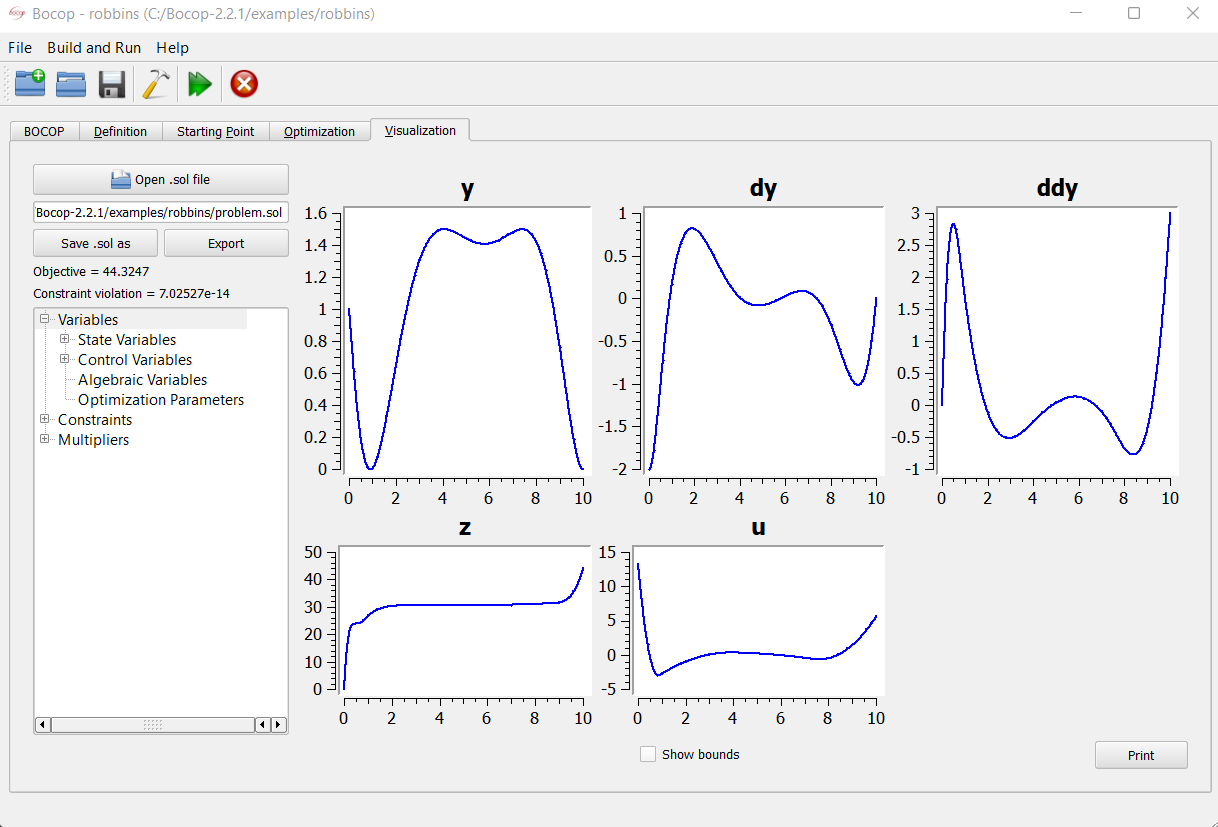

Para $\ddot{y}(t_f)=5$,
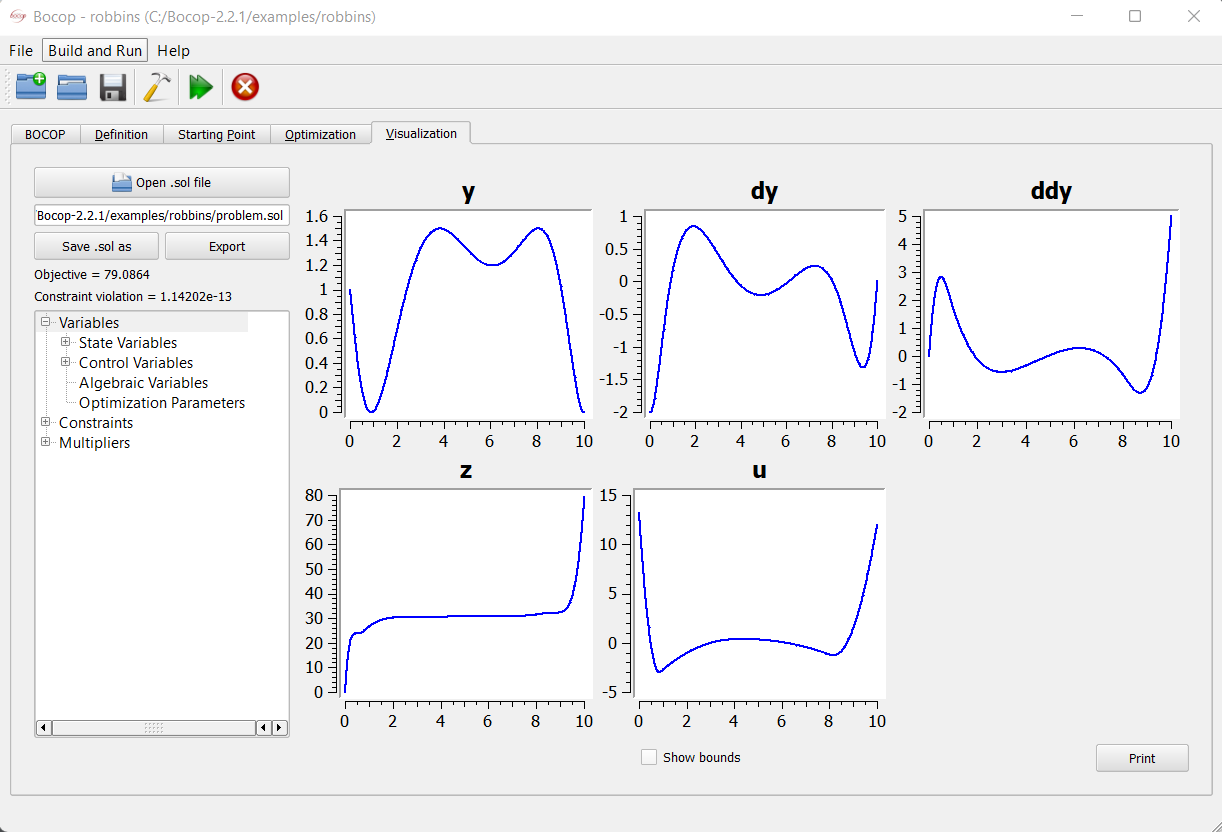

Para $\ddot{y}(t_f)=7$,
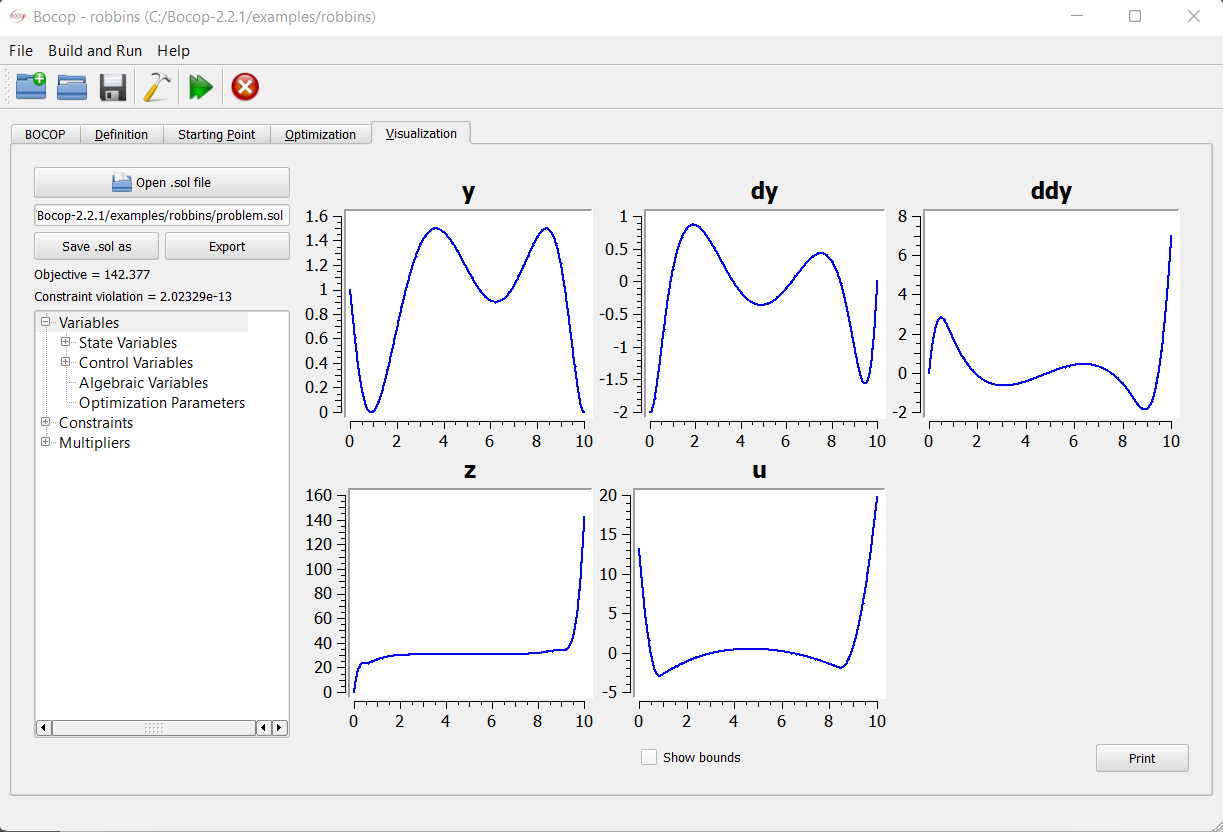

Con estos resultados, se puede ver que el valor objetivo para distintos valores de $\ddot{y}(t_f)$ con $t_f=3,5,7$ fueron $44.3, 79.1$ y $142.4$ respectivamente.

## 4

En esta parte del problema, se agrega un término $\alpha y$ a la dinámica del sistema con $\alpha=3$. Es decir, la dinámica resulta:
$\displaystyle \int_0^{t_f} u(t)^2 + 3y(t) dt$  

Para $\ddot{y}(t_f) = 3$,
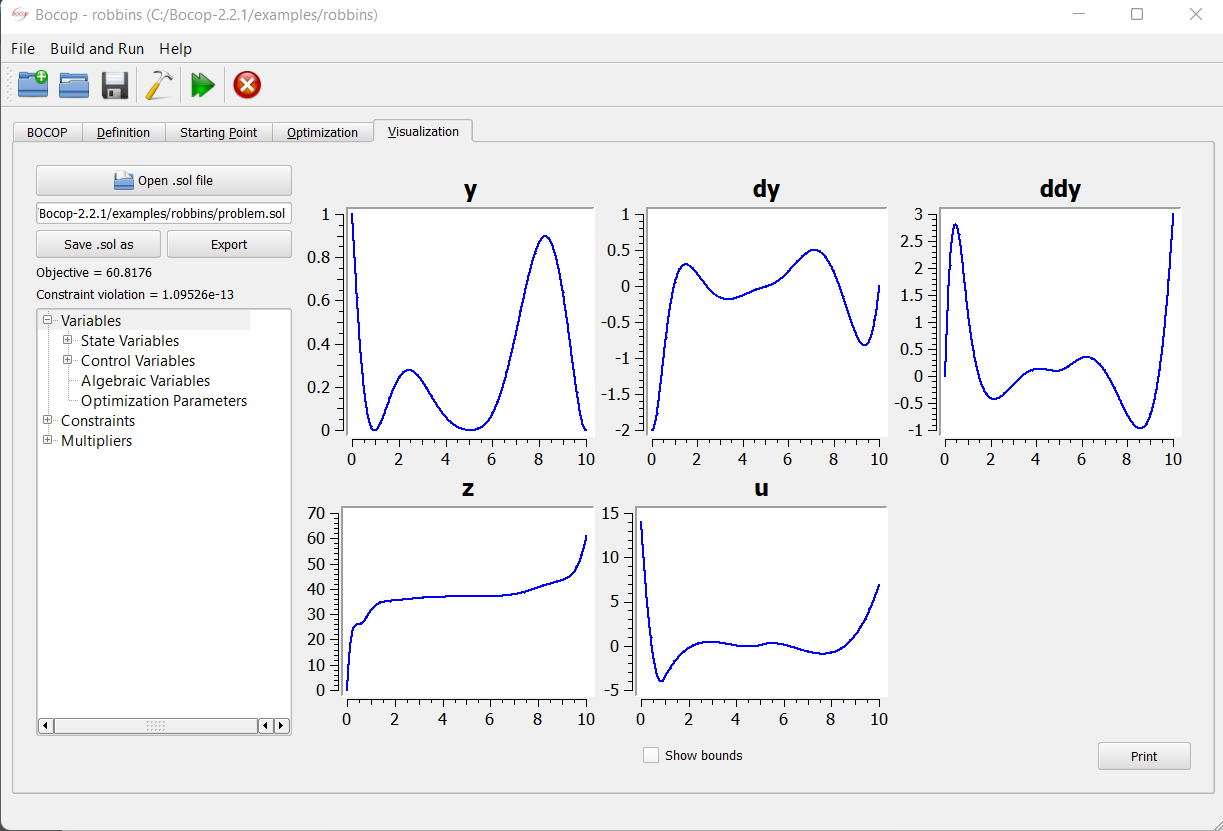

Para $\ddot{y}(t_f) = 5$,
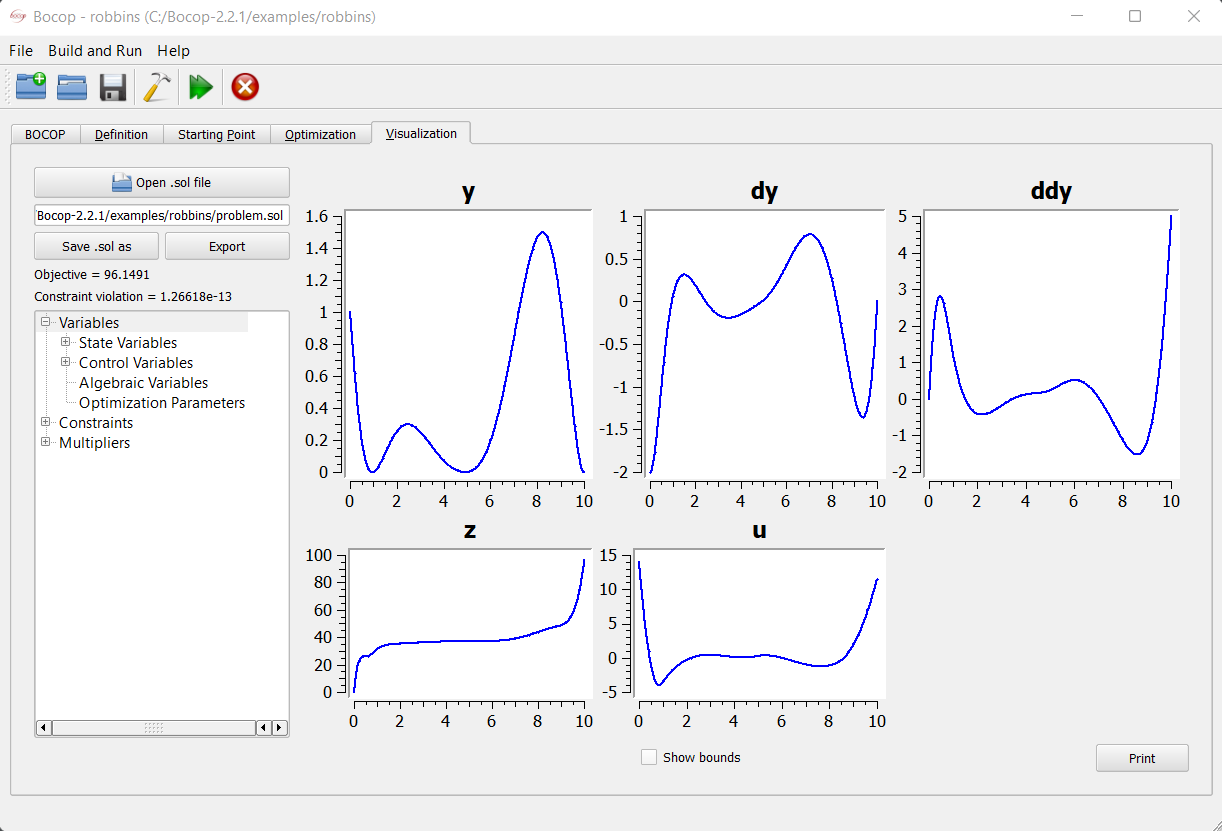

Para $\ddot{y}(t_f) = 7$,
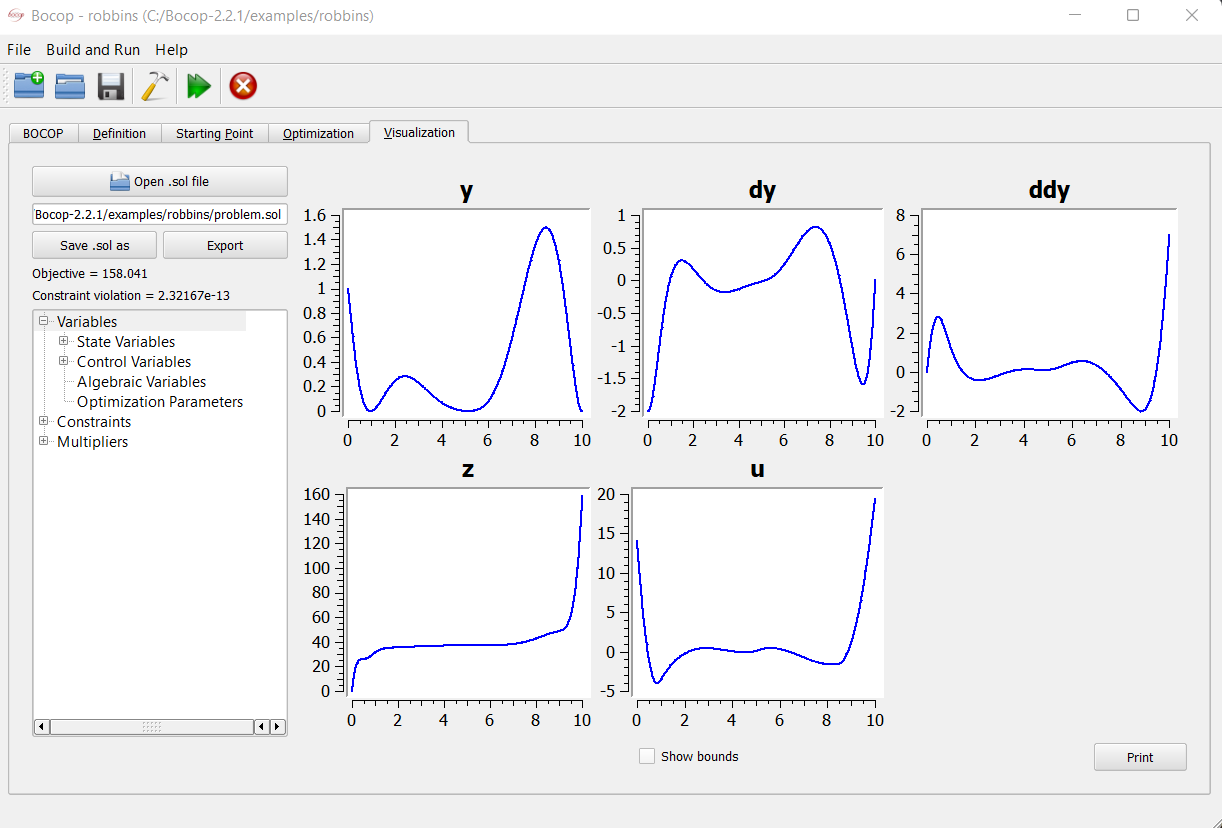

Con estos resultados, se puede ver que el valor objetivo para distintos valores de $\ddot{y}(t_f)$ con $t_f=3,5,7$ fueron $60.1, 96.1$ y $158$ respectivamente.